# DS-SF-30 | Scratchpad 06: Data Wrangling and Exploratory Data Analysis on the Storms Dataset; Ivan's Notebook

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-06-storms.csv.gz'))

In [3]:
df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,...,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,...,8755.0,0.0,0.0,NaN,2.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,...,8742.0,0.0,0.0,NaN,3.0
3,1.0,6/8/1951 0:00:00,900,CST,89.0,...,8626.0,0.0,0.0,NaN,4.0
4,1.0,11/15/1951 0:00:00,1500,CST,43.0,...,8642.0,0.0,0.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
902292,56.0,11/30/2011 0:00:00,10:30:00 PM,MST,7.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A strong cold front moved s...,902293.0
902293,30.0,11/10/2011 0:00:00,02:48:00 PM,MST,9.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A strong westerly flow alof...,902294.0
902294,2.0,11/8/2011 0:00:00,02:58:00 PM,AKS,213.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902295.0
902295,2.0,11/9/2011 0:00:00,10:21:00 AM,AKS,202.0,...,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902296.0


In [4]:
df.shape

(902297, 37)

# Data Wrangling

## Columns

In [5]:
df.columns

Index([u'STATE__', u'BGN_DATE', u'BGN_TIME', u'TIME_ZONE', u'COUNTY',
       u'COUNTYNAME', u'STATE', u'EVTYPE', u'BGN_RANGE', u'BGN_AZI',
       u'BGN_LOCATI', u'END_DATE', u'END_TIME', u'COUNTY_END', u'COUNTYENDN',
       u'END_RANGE', u'END_AZI', u'END_LOCATI', u'LENGTH', u'WIDTH', u'F',
       u'MAG', u'FATALITIES', u'INJURIES', u'PROPDMG', u'PROPDMGEXP',
       u'CROPDMG', u'CROPDMGEXP', u'WFO', u'STATEOFFIC', u'ZONENAMES',
       u'LATITUDE', u'LONGITUDE', u'LATITUDE_E', u'LONGITUDE_', u'REMARKS',
       u'REFNUM'],
      dtype='object')

> ### Set the dataframe index to `REFNUM`.

In [6]:
df = df.set_index('REFNUM')

In [7]:
df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
1.0,1.0,4/18/1950 0:00:00,130,CST,97.0,...,3040.0,8812.0,3051.0,8806.0,NaN
2.0,1.0,4/18/1950 0:00:00,145,CST,3.0,...,3042.0,8755.0,0.0,0.0,NaN
3.0,1.0,2/20/1951 0:00:00,1600,CST,57.0,...,3340.0,8742.0,0.0,0.0,NaN
4.0,1.0,6/8/1951 0:00:00,900,CST,89.0,...,3458.0,8626.0,0.0,0.0,NaN
5.0,1.0,11/15/1951 0:00:00,1500,CST,43.0,...,3412.0,8642.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902293.0,56.0,11/30/2011 0:00:00,10:30:00 PM,MST,7.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A strong cold front moved s...
902294.0,30.0,11/10/2011 0:00:00,02:48:00 PM,MST,9.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A strong westerly flow alof...
902295.0,2.0,11/8/2011 0:00:00,02:58:00 PM,AKS,213.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...


## Check for `NaN`

In [8]:
df.isnull()

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
1.0,False,False,False,False,False,...,False,False,False,False,True
2.0,False,False,False,False,False,...,False,False,False,False,True
3.0,False,False,False,False,False,...,False,False,False,False,True
4.0,False,False,False,False,False,...,False,False,False,False,True
5.0,False,False,False,False,False,...,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
902293.0,False,False,False,False,False,...,False,False,False,False,False
902294.0,False,False,False,False,False,...,False,False,False,False,False
902295.0,False,False,False,False,False,...,False,False,False,False,False


> ### Number of missing values per column:

In [9]:
df.isnull().sum()

STATE__            0
BGN_DATE           0
BGN_TIME           0
TIME_ZONE          0
COUNTY             0
               ...  
LATITUDE          47
LONGITUDE          0
LATITUDE_E        40
LONGITUDE_         0
REMARKS       287433
dtype: int64

In [10]:
df.FATALITIES.isnull().sum()

0

No missing values on `FATALITIES`.

In [11]:
df.INJURIES.isnull().sum()

0

No missing values on `INJURIES` either.

> ### Total number of missing values in the dataset:

In [12]:
df.isnull().sum().sum()

6645709L

> ### Columns with at least one `NaN`:

In [13]:
df.columns[df.isnull().sum() > 0]

Index([u'COUNTYNAME', u'BGN_AZI', u'BGN_LOCATI', u'END_DATE', u'END_TIME',
       u'COUNTYENDN', u'END_AZI', u'END_LOCATI', u'F', u'PROPDMGEXP',
       u'CROPDMGEXP', u'WFO', u'STATEOFFIC', u'ZONENAMES', u'LATITUDE',
       u'LATITUDE_E', u'REMARKS'],
      dtype='object')

> ### Let's do some pretty printing.  In addition to the `NaN` counts, let's add the ratios:

In [14]:
n = df.shape[0]

for column in df.columns:
    count = df[column].isnull().sum()
    if count > 0:
        print '{:10s} {:6d} {:3.0f}%'.format(column, count, 100. * count / n)

COUNTYNAME   1589   0%
BGN_AZI    547332  61%
BGN_LOCATI 287743  32%
END_DATE   243411  27%
END_TIME   238978  26%
COUNTYENDN 902297 100%
END_AZI    724837  80%
END_LOCATI 499225  55%
F          843563  93%
PROPDMGEXP 465934  52%
CROPDMGEXP 618413  69%
WFO        142069  16%
STATEOFFIC 248769  28%
ZONENAMES  594029  66%
LATITUDE       47   0%
LATITUDE_E     40   0%
REMARKS    287433  32%


> ### Drop rows with at least one `NaN`:

In [15]:
df.dropna()

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,


There's nothing left...  At the wrangling phase, it is better to keep as many rows/values as possible as we don't know yet which columns we will want to use when doing data exploratory analysis.

Also equivalent:

```python
df.dropna(how = 'any')
df.dropna(axis = 0)
df.dropna(how = 'any', axis = 0)
```

> ### Drop columns with at least one `NaN`:

In [16]:
df.dropna(axis = 1)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,INJURIES,PROPDMG,CROPDMG,LONGITUDE,LONGITUDE_
REFNUM,,,,,,,,,,,
1.0,1.0,4/18/1950 0:00:00,130,CST,97.0,...,15.0,25.0,0.0,8812.0,8806.0
2.0,1.0,4/18/1950 0:00:00,145,CST,3.0,...,0.0,2.5,0.0,8755.0,0.0
3.0,1.0,2/20/1951 0:00:00,1600,CST,57.0,...,2.0,25.0,0.0,8742.0,0.0
4.0,1.0,6/8/1951 0:00:00,900,CST,89.0,...,2.0,2.5,0.0,8626.0,0.0
5.0,1.0,11/15/1951 0:00:00,1500,CST,43.0,...,2.0,2.5,0.0,8642.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
902293.0,56.0,11/30/2011 0:00:00,10:30:00 PM,MST,7.0,...,0.0,0.0,0.0,0.0,0.0
902294.0,30.0,11/10/2011 0:00:00,02:48:00 PM,MST,9.0,...,0.0,0.0,0.0,0.0,0.0
902295.0,2.0,11/8/2011 0:00:00,02:58:00 PM,AKS,213.0,...,0.0,0.0,0.0,0.0,0.0


Also equivalent:

```python
df.dropna(how = 'any', axis = 1)
```

> ### Drop rows with all values as `NaN`:

df.dropna(how = 'all')

> ### Drop columns with all values as `NaN`:

In [17]:
df.dropna(how = 'all', axis = 1)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
1.0,1.0,4/18/1950 0:00:00,130,CST,97.0,...,3040.0,8812.0,3051.0,8806.0,NaN
2.0,1.0,4/18/1950 0:00:00,145,CST,3.0,...,3042.0,8755.0,0.0,0.0,NaN
3.0,1.0,2/20/1951 0:00:00,1600,CST,57.0,...,3340.0,8742.0,0.0,0.0,NaN
4.0,1.0,6/8/1951 0:00:00,900,CST,89.0,...,3458.0,8626.0,0.0,0.0,NaN
5.0,1.0,11/15/1951 0:00:00,1500,CST,43.0,...,3412.0,8642.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902293.0,56.0,11/30/2011 0:00:00,10:30:00 PM,MST,7.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A strong cold front moved s...
902294.0,30.0,11/10/2011 0:00:00,02:48:00 PM,MST,9.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A strong westerly flow alof...
902295.0,2.0,11/8/2011 0:00:00,02:58:00 PM,AKS,213.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...


You can also use thresholds

```python
df.dropna(thresh =)
```

## Handling duplicate data

- (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html)
- (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)

In [18]:
df.duplicated()

REFNUM
1.0         False
2.0         False
3.0         False
4.0         False
5.0         False
            ...  
902293.0    False
902294.0    False
902295.0    False
902296.0    False
902297.0    False
dtype: bool

In [19]:
df.duplicated().sum()

3143

In [20]:
df[df.duplicated()]

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
19.0,1.0,5/10/1952 0:00:00,900,CST,57.0,...,3344.0,8745.0,0.0,0.0,NaN
20.0,1.0,5/10/1952 0:00:00,900,CST,57.0,...,3344.0,8745.0,0.0,0.0,NaN
260.0,1.0,7/4/1960 0:00:00,1750,CST,13.0,...,3139.0,8636.0,0.0,0.0,NaN
603.0,1.0,5/14/1967 0:00:00,2330,CST,77.0,...,3453.0,8730.0,0.0,0.0,NaN
604.0,1.0,5/14/1967 0:00:00,2330,CST,77.0,...,3453.0,8730.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
900771.0,38.0,10/7/2011 0:00:00,03:00:00 PM,CST,7.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A strong early October low ...
900806.0,27.0,10/7/2011 0:00:00,04:00:00 PM,CST,1.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A strong early October low ...
900807.0,36.0,10/29/2011 0:00:00,01:00:00 PM,EST,57.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: An early season winter stor...


In [21]:
df.drop_duplicates(inplace = True)

In [22]:
df.duplicated().sum()

0

In [23]:
df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS
REFNUM,,,,,,,,,,,
1.0,1.0,4/18/1950 0:00:00,130,CST,97.0,...,3040.0,8812.0,3051.0,8806.0,NaN
2.0,1.0,4/18/1950 0:00:00,145,CST,3.0,...,3042.0,8755.0,0.0,0.0,NaN
3.0,1.0,2/20/1951 0:00:00,1600,CST,57.0,...,3340.0,8742.0,0.0,0.0,NaN
4.0,1.0,6/8/1951 0:00:00,900,CST,89.0,...,3458.0,8626.0,0.0,0.0,NaN
5.0,1.0,11/15/1951 0:00:00,1500,CST,43.0,...,3412.0,8642.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902293.0,56.0,11/30/2011 0:00:00,10:30:00 PM,MST,7.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A strong cold front moved s...
902294.0,30.0,11/10/2011 0:00:00,02:48:00 PM,MST,9.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A strong westerly flow alof...
902295.0,2.0,11/8/2011 0:00:00,02:58:00 PM,AKS,213.0,...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...


## Fatalities and Injuries

- (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [24]:
df.rename(columns = {'FATALITIES': 'Fatalities', 'INJURIES': 'Injuries'}, inplace = True)

## Property and Crop Damages

In [25]:
np.sort(df.PROPDMGEXP.unique())

array([nan, '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '?',
       'B', 'H', 'K', 'M', 'h', 'm'], dtype=object)

In [26]:
np.sort(df.CROPDMGEXP.unique())

array([nan, '0', '2', '?', 'B', 'K', 'M', 'k', 'm'], dtype=object)

In [27]:
exponent_to_multiplier = {
    '+': np.nan, '-': np.nan, '?': np.nan,
    '0': 10 ** 0,
    '1': 10 ** 1,
    '2': 10 ** 2, 'H': 10 ** 2, 'h': 10 ** 2,
    '3': 10 ** 3,'K': 10 ** 3,'k': 10 ** 3,
    '4': 10 ** 4,
    '5': 10 ** 5,
    '6': 10 ** 6, 'M': 10 ** 6, 'm': 10 ** 6,
    '7': 10 ** 7,
    '8': 10 ** 8,
    'B': 10 ** 9
}

In [28]:
df['PropertyDamages'] = df.PROPDMG * df.PROPDMGEXP.map(exponent_to_multiplier)

In [29]:
df['CropDamages'] = df.CROPDMG * df.CROPDMGEXP.map(exponent_to_multiplier)

In [30]:
df.PropertyDamages

REFNUM
1.0         25000.0
2.0          2500.0
3.0         25000.0
4.0          2500.0
5.0          2500.0
             ...   
902293.0        0.0
902294.0        0.0
902295.0        0.0
902296.0        0.0
902297.0        0.0
Name: PropertyDamages, dtype: float64

In [31]:
df.drop(['PROPDMG', 'PROPDMGEXP', 'CROPDMG', 'CROPDMGEXP'], axis = 1, inplace = True)

In [32]:
df

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,...,LATITUDE_E,LONGITUDE_,REMARKS,PropertyDamages,CropDamages
REFNUM,,,,,,,,,,,
1.0,1.0,4/18/1950 0:00:00,130,CST,97.0,...,3051.0,8806.0,NaN,25000.0,NaN
2.0,1.0,4/18/1950 0:00:00,145,CST,3.0,...,0.0,0.0,NaN,2500.0,NaN
3.0,1.0,2/20/1951 0:00:00,1600,CST,57.0,...,0.0,0.0,NaN,25000.0,NaN
4.0,1.0,6/8/1951 0:00:00,900,CST,89.0,...,0.0,0.0,NaN,2500.0,NaN
5.0,1.0,11/15/1951 0:00:00,1500,CST,43.0,...,0.0,0.0,NaN,2500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902293.0,56.0,11/30/2011 0:00:00,10:30:00 PM,MST,7.0,...,0.0,0.0,EPISODE NARRATIVE: A strong cold front moved s...,0.0,0.0
902294.0,30.0,11/10/2011 0:00:00,02:48:00 PM,MST,9.0,...,0.0,0.0,EPISODE NARRATIVE: A strong westerly flow alof...,0.0,0.0
902295.0,2.0,11/8/2011 0:00:00,02:58:00 PM,AKS,213.0,...,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,0.0,0.0


In [33]:
fatalities = df.Fatalities.sum()
injuries = df.Injuries.sum()
property_damages = df.PropertyDamages.sum()
crop_damages = df.CropDamages.sum()

In [34]:
print fatalities
print injuries

# Converting damamges from $ to $B
print property_damages / (10 ** 6)
print crop_damages / (10 ** 6)

15081.0
139710.0
426636.961988
49028.86267


## Dropping uneventfull observations

In [35]:
df.shape[0]

899154

In [36]:
df[(df.Fatalities > 0) | (df.Injuries > 0) | (df.PropertyDamages > 0) | (df.CropDamages > 0)].shape[0]

253819

> ### We have quite a number of events in which nothing interesting happened.  Let's drop them to make the rest of wrangling the data easier.

In [37]:
df = df[(df.Fatalities > 0) | (df.Injuries > 0) | (df.PropertyDamages > 0) | (df.CropDamages > 0)]

## Event Types

In [38]:
np.sort(df.EVTYPE.unique())

array(['   HIGH SURF ADVISORY', ' FLASH FLOOD', ' TSTM WIND',
       ' TSTM WIND (G45)', '?', 'AGRICULTURAL FREEZE', 'APACHE COUNTY',
       'ASTRONOMICAL HIGH TIDE', 'ASTRONOMICAL LOW TIDE', 'AVALANCE',
       'AVALANCHE', 'BLACK ICE', 'BLIZZARD', 'BLIZZARD/WINTER STORM',
       'BLOWING DUST', 'BLOWING SNOW', 'BRUSH FIRE', 'Beach Erosion',
       'COASTAL  FLOODING/EROSION', 'COASTAL EROSION', 'COASTAL FLOOD',
       'COASTAL FLOODING', 'COASTAL FLOODING/EROSION', 'COASTAL STORM',
       'COASTAL SURGE', 'COASTALSTORM', 'COLD', 'COLD AIR TORNADO',
       'COLD AND SNOW', 'COLD AND WET CONDITIONS', 'COLD WAVE',
       'COLD WEATHER', 'COLD/WIND CHILL', 'COLD/WINDS', 'COOL AND WET',
       'Coastal Flood', 'Coastal Flooding', 'Coastal Storm', 'Cold',
       'Cold Temperature', 'DAM BREAK', 'DAMAGING FREEZE', 'DENSE FOG',
       'DENSE SMOKE', 'DOWNBURST', 'DROUGHT', 'DROUGHT/EXCESSIVE HEAT',
       'DROWNING', 'DRY MICROBURST', 'DRY MIRCOBURST WINDS', 'DUST DEVIL',
       'DUST DEVIL W

In [39]:
len(df.EVTYPE.unique())

485

> ### Let's convert these events to uppercase and clean up some whitespace

In [40]:
df['EVTYPE'] = df.EVTYPE.apply(lambda event_type: event_type.strip().upper())

In [41]:
len(df.EVTYPE.unique())

441

### Official Event Types

- (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html)

In [42]:
official_event_types = [
    'Astronomical Low Tide', 'Avalanche',
    'Blizzard', 'Coastal Flood', 'Cold/Wind Chill', 'Debris Flow',
    'Dense Fog', 'Dense Smoke', 'Drought', 'Dust Devil', 'Dust Storm',
    'Excessive Heat', 'Extreme Cold/Wind Chill', 'Flash Flood', 'Flood',
    'Frost/Freeze', 'Funnel Cloud', 'Freezing Fog', 'Hail', 'Heat',
    'Heavy Rain', 'Heavy Snow', 'High Surf', 'High Wind',
    'Hurricane (Typhoon)', 'Ice Storm', 'Lake-Effect Snow',
    'Lakeshore Flood', 'Lightning', 'Marine Hail', 'Marine High Wind',
    'Marine Strong Wind', 'Marine Thunderstorm Wind', 'Rip Current',
    'Seiche', 'Sleet', 'Storm Surge/Tide', 'Strong Wind',
    'Thunderstorm Wind', 'Tornado', 'Tropical Depression',
    'Tropical Storm', 'Tsunami', 'Volcanic Ash', 'Waterspout', 'Wildfire',
    'Winter Storm', 'Winter Weather',

    'OTHER'
]

official_event_types = map(lambda event_type: event_type.upper(), official_event_types)

In [43]:
official_event_types

['ASTRONOMICAL LOW TIDE',
 'AVALANCHE',
 'BLIZZARD',
 'COASTAL FLOOD',
 'COLD/WIND CHILL',
 'DEBRIS FLOW',
 'DENSE FOG',
 'DENSE SMOKE',
 'DROUGHT',
 'DUST DEVIL',
 'DUST STORM',
 'EXCESSIVE HEAT',
 'EXTREME COLD/WIND CHILL',
 'FLASH FLOOD',
 'FLOOD',
 'FROST/FREEZE',
 'FUNNEL CLOUD',
 'FREEZING FOG',
 'HAIL',
 'HEAT',
 'HEAVY RAIN',
 'HEAVY SNOW',
 'HIGH SURF',
 'HIGH WIND',
 'HURRICANE (TYPHOON)',
 'ICE STORM',
 'LAKE-EFFECT SNOW',
 'LAKESHORE FLOOD',
 'LIGHTNING',
 'MARINE HAIL',
 'MARINE HIGH WIND',
 'MARINE STRONG WIND',
 'MARINE THUNDERSTORM WIND',
 'RIP CURRENT',
 'SEICHE',
 'SLEET',
 'STORM SURGE/TIDE',
 'STRONG WIND',
 'THUNDERSTORM WIND',
 'TORNADO',
 'TROPICAL DEPRESSION',
 'TROPICAL STORM',
 'TSUNAMI',
 'VOLCANIC ASH',
 'WATERSPOUT',
 'WILDFIRE',
 'WINTER STORM',
 'WINTER WEATHER',
 'OTHER']

In [44]:
subset_df = df[df.EVTYPE.isin(official_event_types)]

In [45]:
def summary(subset_df):
    print 'Using official event types: {:.1f}%'.format(100. * subset_df.shape[0] / df.shape[0])
    print '  - Fatalities:             {:.1f}%'.format(100. * subset_df.Fatalities.sum() / fatalities)
    print '  - Injuries:               {:.1f}%'.format(100. * subset_df.Injuries.sum() / injuries)
    print '  - Property damages:       {:.1f}%'.format(100. * subset_df.PropertyDamages.sum() / property_damages)
    print '  - Crop damages:           {:.1f}%'.format(100. * subset_df.CropDamages.sum() / crop_damages)

In [46]:
summary(subset_df)

Using official event types: 67.8%
  - Fatalities:             86.2%
  - Injuries:               90.1%
  - Property damages:       64.3%
  - Crop damages:           70.5%


### Unofficial Event Types

- (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

In [47]:
todo_df = df[~ df.index.isin(subset_df.index) & (df.Fatalities > 0)]

In [48]:
todo_df[ ['EVTYPE', 'Fatalities'] ].\
    groupby('EVTYPE').\
    sum().\
    sort_values(by = 'Fatalities', ascending = False)

,Fatalities
EVTYPE,
TSTM WIND,504.0
RIP CURRENTS,204.0
HEAT WAVE,172.0
EXTREME COLD,162.0
EXTREME HEAT,96.0
...,...
MARINE ACCIDENT,1.0
MINOR FLOODING,1.0
MUDSLIDES,1.0


Let's manually process the event types to increase the coverage in each categorie (fatalities, injuries, and damages) to 95%+.

In [49]:
unrecognized_event_types_to_recognized_event_types = {
    'COLD': 'COLD/WIND CHILL',
    'COLD AND SNOW': 'COLD/WIND CHILL',
    'COLD WEATHER': 'COLD/WIND CHILL',
    'EXTREME COLD': 'EXTREME COLD/WIND CHILL',
    'EXTREME HEAT': 'EXCESSIVE HEAT',
    'EXTREME WINDCHILL': 'EXTREME COLD/WIND CHILL',
    'FLASH FLOOD/FLOOD': 'FLASH FLOOD',
    'FLASH FLOODING': 'FLASH FLOOD',
    'FLASH FLOODING/FLOOD': 'FLASH FLOOD',
    'FLOOD/FLASH FLOOD': 'FLASH FLOOD',
    'FLOODING': 'FLOOD',
    'FOG': 'DENSE FOG',
    'FREEZE': 'FROST/FREEZE',
    'FREEZING RAIN': 'HEAVY RAIN',
    'GLAZE': 'OTHER',
    'HEAT WAVE': 'HEAT',
    'HEAT WAVES': 'HEAT',
    'HEAVY RAIN/SEVERE WEATHER': 'HEAVY RAIN',
    'HEAVY SURF': 'HIGH SURF',
    'HEAVY SURF/HIGH SURF': 'HIGH SURF',
    'HIGH SEAS': 'OTHER',
    'HIGH WINDS': 'HIGH WIND',
    'HURRICANE': 'HURRICANE (TYPHOON)',
    'HURRICANE ERIN': 'HURRICANE (TYPHOON)',
    'HURRICANE OPAL': 'HURRICANE (TYPHOON)',
    'HURRICANE/TYPHOON': 'HURRICANE (TYPHOON)',
    'HYPOTHERMIA/EXPOSURE': 'OTHER',
    'ICE': 'ICE STORM',
    'ICY ROADS': 'OTHER',
    'LANDSLIDE': 'OTHER',
    'LOW TEMPERATURE': 'COLD/WIND CHILL',
    'MARINE MISHAP': 'MARINE HAIL',
    'MARINE TSTM WIND': 'MARINE THUNDERSTORM WIND RIP CURRENT',
    'RECORD/EXCESSIVE HEAT': 'EXCESSIVE HEAT',
    'RIP CURRENTS': 'MARINE THUNDERSTORM WIND RIP CURRENT',
    'RIVER FLOOD': 'FLOOD',
    'ROUGH SEAS': 'MARINE STRONG WIND',
    'SEVERE THUNDERSTORM': 'THUNDERSTORM WIND',
    'STORM SURGE': 'STORM SURGE/TIDE',
    'STRONG WINDS': 'STRONG WIND',
    'THUNDERSTORM WINDS': 'THUNDERSTORM WIND',
    'TORNADOES, TSTM WIND, HAIL': 'TORNADO',
    'TROPICAL STORM GORDON': 'TROPICAL STORM',
    'TSTM WIND': 'THUNDERSTORM WIND',
    'TSTM WIND/HAIL': 'THUNDERSTORM WIND',
    'TYPHOON': 'HURRICANE (TYPHOON)',
    'UNSEASONABLY WARM': 'OTHER',
    'UNSEASONABLY WARM AND DRY': 'OTHER',
    'URBAN/SML STREAM FLD': 'FLOOD',
    'WILD FIRES': 'WILDFIRE',
    'WILD/FOREST FIRE': 'WILDFIRE',
    'WIND': 'HIGH WIND',
    'WINTER STORMS': 'WINTER STORM',
    'WINTER WEATHER/MIX': 'WINTER WEATHER'
}

In [50]:
def event_type(event_type):
    if event_type in official_event_types:
        return event_type

    if event_type in unrecognized_event_types_to_recognized_event_types:
        return unrecognized_event_types_to_recognized_event_types[event_type]

    return 'OTHER'

In [51]:
df.EVTYPE = df.EVTYPE.apply(event_type)

In [52]:
summary(df[df.EVTYPE.isin(official_event_types)])

Using official event types: 99.9%
  - Fatalities:             98.6%
  - Injuries:               99.8%
  - Property damages:       100.0%
  - Crop damages:           100.0%


In [53]:
df = df[df.EVTYPE.isin(official_event_types)]

In [54]:
df.rename(columns = {'EVTYPE': 'EventType'}, inplace = True)

> ### There is still some data wrangling to do but we will call it a day for now.  Ideally, you want to save this new dataset and create a new notebook for the exploratory data analysis.

# Exploratory Data Analysis

## Top events

In [55]:
sum_df = df[ ['EventType', 'Fatalities', 'Injuries', 'PropertyDamages', 'CropDamages'] ].\
    groupby('EventType').\
    sum()

# Changing the unit of damages from $ to $B
sum_df.PropertyDamages = sum_df.PropertyDamages / (10 ** 9)
sum_df.CropDamages = sum_df.CropDamages / (10 ** 9)

### Fatalities

In [56]:
fatalities_df = sum_df[ ['Fatalities'] ].\
    sort_values(by = 'Fatalities', ascending = False)

fatalities_df

,Fatalities
EventType,
TORNADO,5620.0
EXCESSIVE HEAT,2016.0
HEAT,1112.0
FLASH FLOOD,1031.0
LIGHTNING,816.0
...,...
FREEZING FOG,0.0
LAKESHORE FLOOD,0.0
SEICHE,0.0


### Injuries

In [57]:
injuries_df = sum_df[ ['Injuries'] ].\
    sort_values(by = 'Injuries', ascending = False)

injuries_df

,Injuries
EventType,
TORNADO,90540.0
THUNDERSTORM WIND,9444.0
FLOOD,6872.0
EXCESSIVE HEAT,6680.0
LIGHTNING,5223.0
...,...
LAKE-EFFECT SNOW,0.0
VOLCANIC ASH,0.0
FREEZING FOG,0.0


### Property Damages

In [58]:
property_damages_df = sum_df[ ['PropertyDamages'] ].\
    sort_values(by = 'PropertyDamages', ascending = False)

property_damages_df

,PropertyDamages
EventType,
FLOOD,148.838361
HURRICANE (TYPHOON),85.205335
TORNADO,58.130074
STORM SURGE/TIDE,47.964344
FLASH FLOOD,17.537886
...,...
FUNNEL CLOUD,0.000175
DENSE SMOKE,0.000100
MARINE HAIL,0.000004


### Crop Damages

In [59]:
crop_damages_df = sum_df[ ['CropDamages'] ].\
    sort_values(by = 'CropDamages', ascending = False)

crop_damages_df

,CropDamages
EventType,
DROUGHT,13.972566
FLOOD,10.706070
HURRICANE (TYPHOON),5.505618
ICE STORM,5.022113
HAIL,3.025434
...,...
LAKE-EFFECT SNOW,0.000000
FUNNEL CLOUD,0.000000
ASTRONOMICAL LOW TIDE,0.000000


## Plots

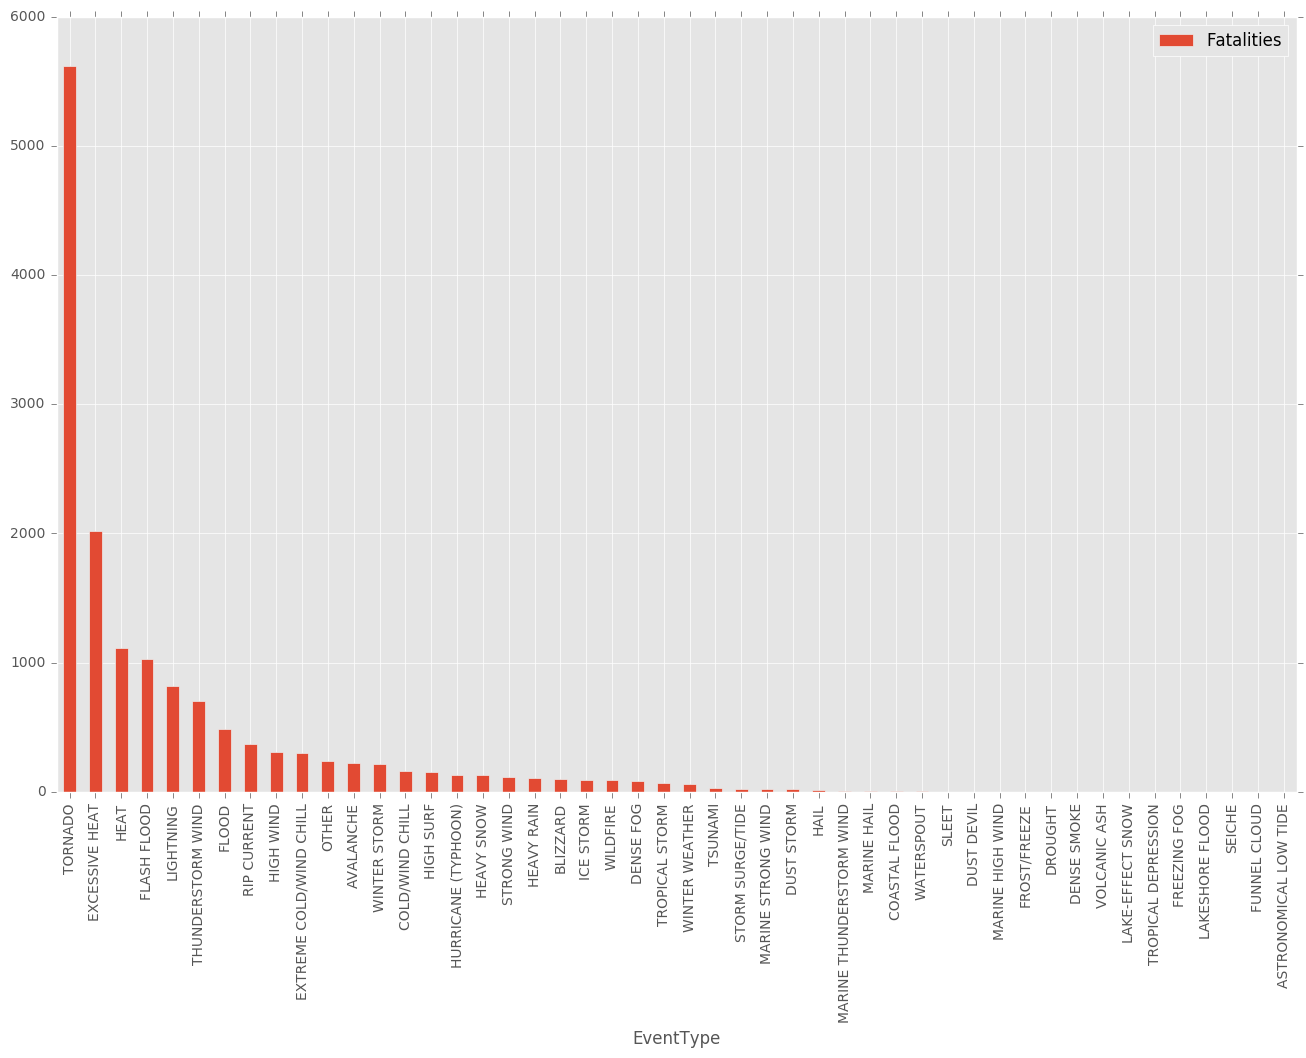

In [60]:
fatalities_df.plot(kind = 'bar', figsize = (16, 10))

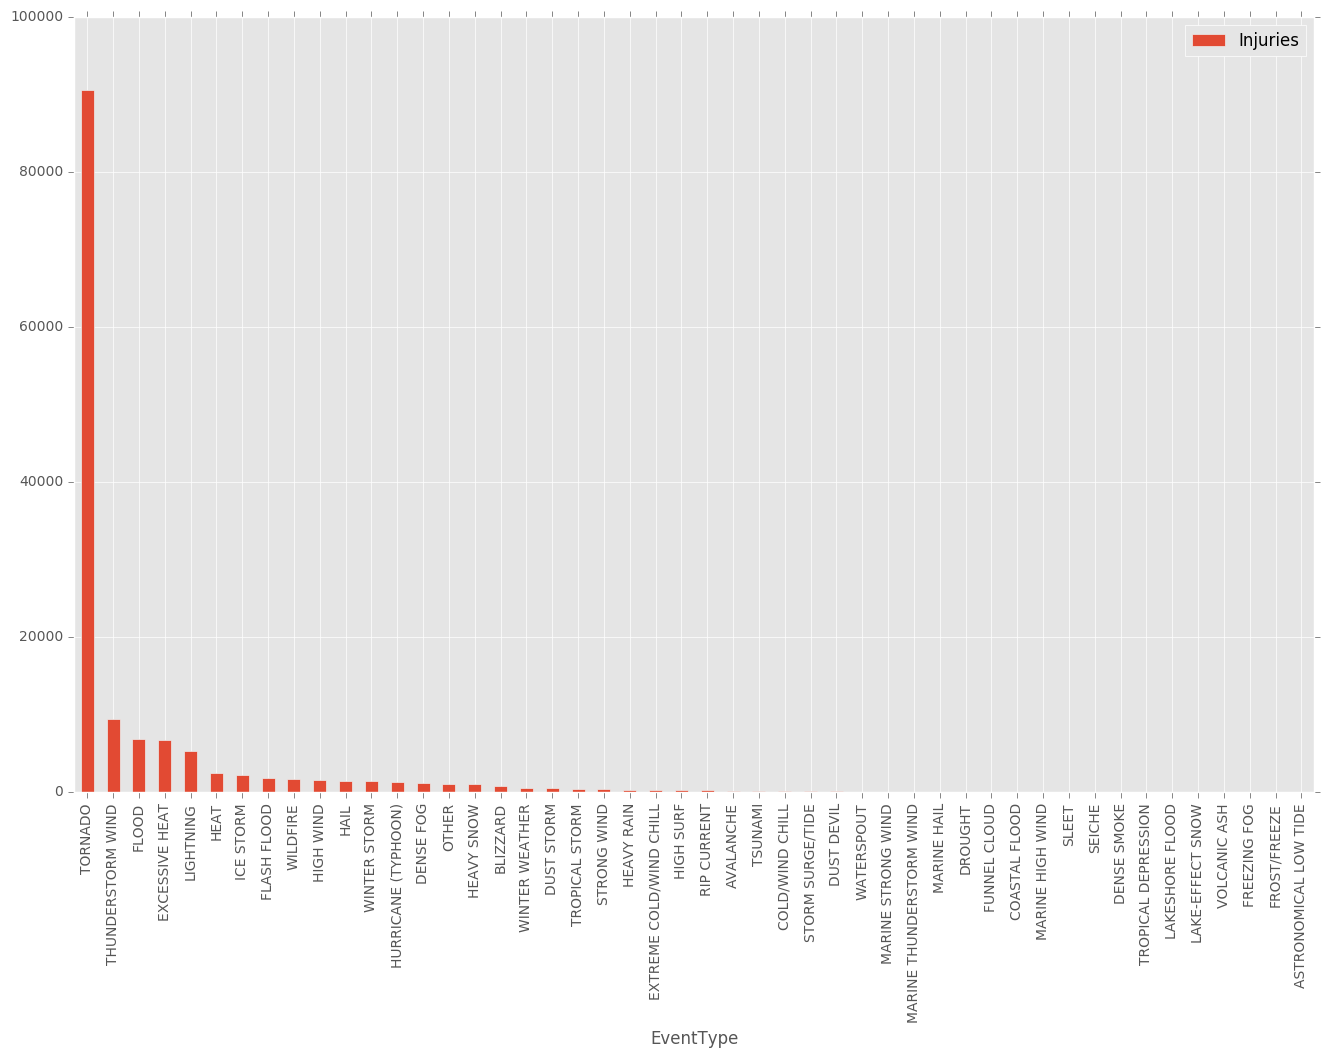

In [61]:
injuries_df.plot(kind = 'bar', figsize = (16, 10))

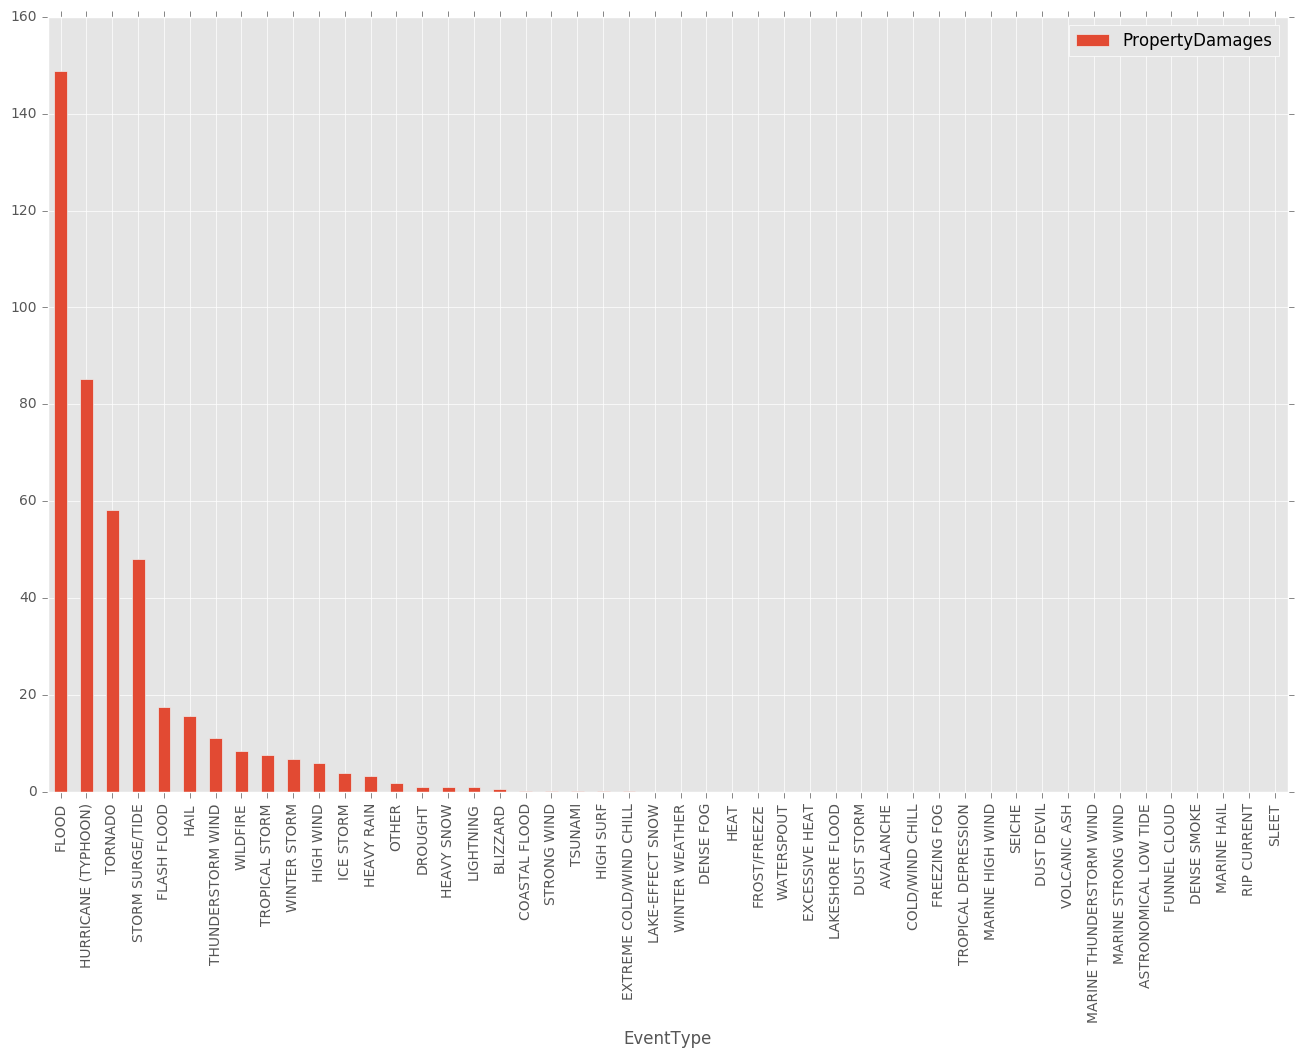

In [62]:
property_damages_df.plot(kind = 'bar', figsize = (16, 10))

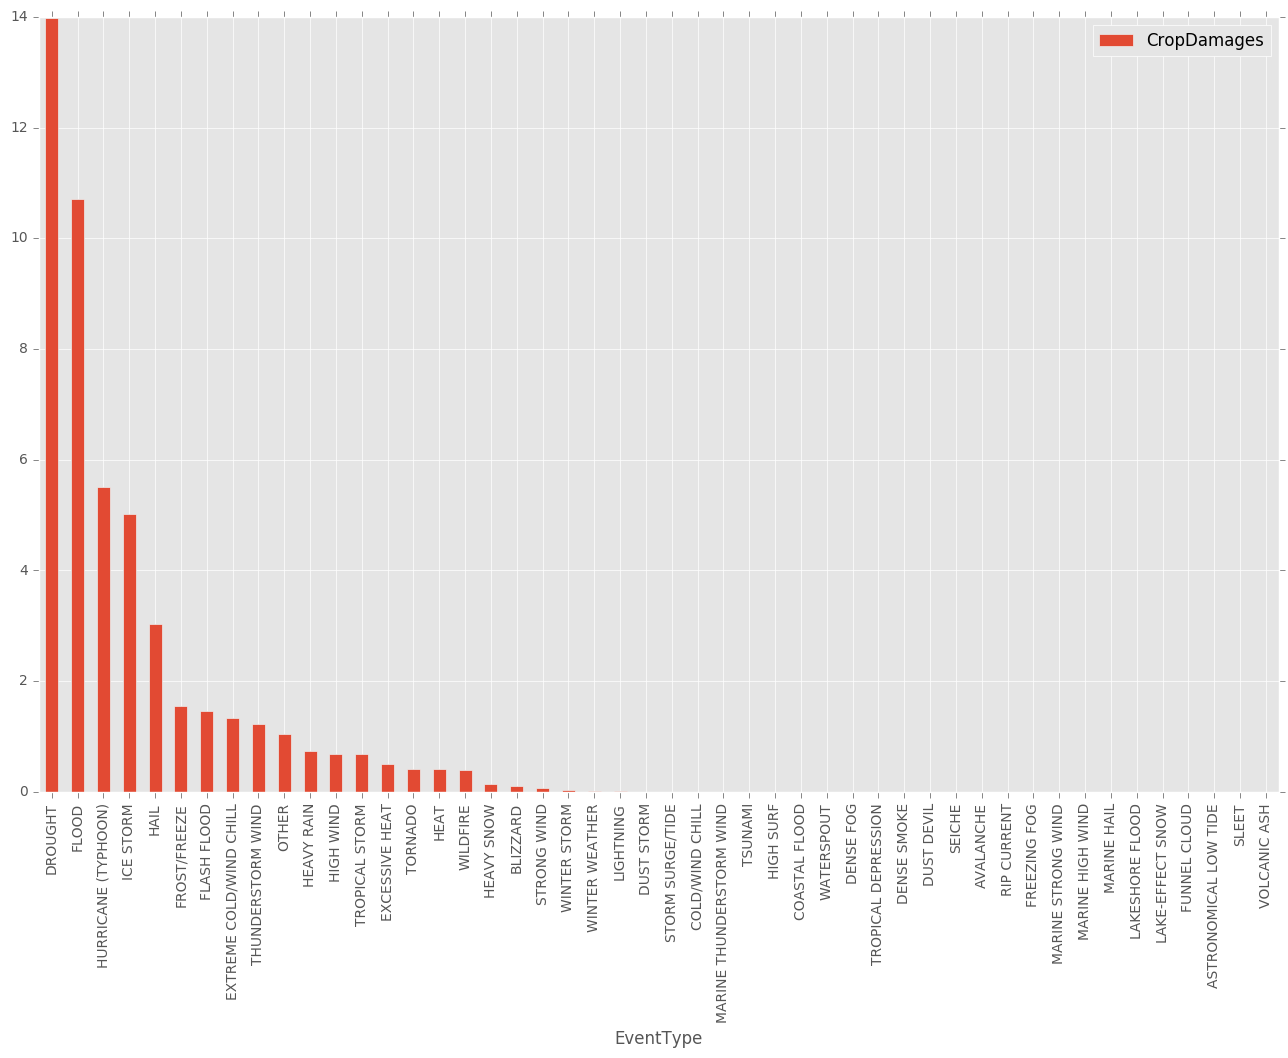

In [63]:
crop_damages_df.plot(kind = 'bar', figsize = (16, 10))

## Aggregation by state and year

In [64]:
df.rename(columns = {'STATE': 'State'}, inplace = True)

In [65]:
df.BGN_DATE = pd.to_datetime(df.BGN_DATE)

In [66]:
df['Year'] = df.BGN_DATE.map(lambda timestamp: timestamp.year)

In [67]:
aggregated_df = df[ ['EventType', 'State', 'Year', 'Fatalities', 'Injuries', 'PropertyDamages', 'CropDamages'] ].\
    groupby(['EventType', 'State', 'Year']).\
    sum()

In [68]:
aggregated_df

Fatalities  Injuries  PropertyDamages  \
EventType             State Year                                          
ASTRONOMICAL LOW TIDE CA    2007         0.0       0.0         120000.0   
                      ME    2008         0.0       0.0         200000.0   
AVALANCHE             AK    1995         0.0       0.0           5000.0   
                            1999        12.0       4.0          45000.0   
                            2000         5.0       5.0         754000.0   
...                                      ...       ...              ...   
WINTER WEATHER        WI    2009         0.0       2.0           8000.0   
                            2010         0.0       0.0         294800.0   
                            2011         0.0       0.0           8000.0   
                      WV    2006         0.0       0.0          60000.0   
                      WY    2010         0.0       0.0          20000.0   

                                  CropDamages  
EventType             State Year               
ASTRONOMICAL LOW TIDE CA    2007          0.0  
                      ME    2008          0.0  
AVALANCHE             AK    1995          NaN  
                            1999          NaN  
                            2000          NaN  
...                                       ...  
WINTER WEATHER        WI    2009          0.0  
                            2010   15000000.0  
                            2011          0.0  
                      WV    2006          0.0  
                      WY    2010          0.0  

[12428 rows x 4 columns]

In [69]:
aggregated_df.to_csv(os.path.join('..', 'datasets', 'dataset-06-storms-aggregated.csv'))